In [20]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import chain_code as cc
from otsu import umbralizacionOtsu as UO

In [21]:
def promedio(cadena):
    suma = 0
    for valor in cadena:
        suma = suma + valor

    print(f"La suma es {suma}")

    # Y el promedio se obtiene dividiendo la suma entre la cantidad de elementos
    cantidad_elementos = len(cadena)
    prom = suma / cantidad_elementos
    print(f"El promedio es {prom}")

    return prom

Ubralizacion y muestreo de las imagenes que se van a utilizar

Chain code:
[0, 0, 0, 7, 7, 7, 7, 7, 7, 6, 7, 6, 6, 6, 6, 5, 6, 5, 5, 5, 4, 5, 4, 5, 4, 4, 4, 4, 3, 3, 2, 2, 2, 3, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1]
La suma es 175
El promedio es 3.723404255319149
Chain code:
[7, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 4, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1]
La suma es 149
El promedio es 3.8205128205128207
Chain code:
[0, 0, 0, 0, 0, 0, 6, 6, 5, 6, 6, 6, 5, 6, 4, 5, 5, 5, 7, 7, 6, 6, 7, 7, 6, 6, 4, 4, 2, 3, 2, 3, 3, 4, 5, 5, 4, 5, 5, 4, 5, 4, 4, 4, 3, 1, 2, 1, 2, 1, 0, 1, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 3, 4, 4, 4, 5, 5, 5, 4, 3, 1, 2, 0, 1, 0, 1]
La suma es 251
El promedio es 3.0987654320987654
Chain code:
[0, 0, 0, 0, 0, 0, 6, 7, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 4, 5, 4, 4, 4, 4, 4, 4, 4, 3, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 2, 2, 2, 3, 4, 5, 4, 5, 4, 4, 4, 3, 1, 0, 1, 0, 1, 0, 1, 1, 1, 2, 3, 4, 4, 4, 5, 4, 3, 2, 1]
La suma es 231
El promedio es 3.0
Chain code:
[6, 6, 6, 6, 5, 6, 6, 6,

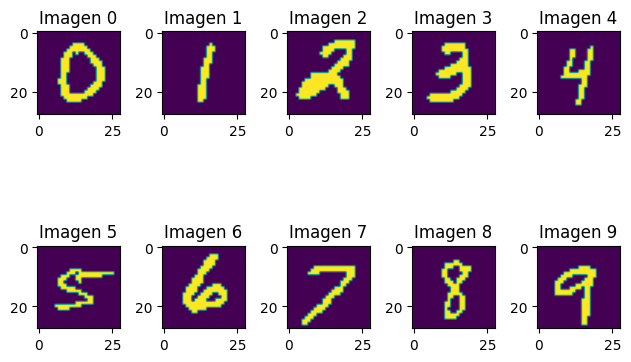

In [24]:
filas = 2
columnas = 5
axes = []
fig = plt.figure()
cadena = np.zeros(filas*columnas)
coordenadas = np.zeros(filas*columnas)

connectivity = 8
background = 0

cadena = []
coordenadas = []

for i in range(filas*columnas):
    ruta = "unoNueve/img_" + str(i) + ".jpg"
    img = UO(ruta)  # se aplica la umbralizacion
    
    cad, coor = cc.trace_boundary(img, connectivity, background)    # se aplica freeman
    cadena.append(cad)
    coordenadas.append(coor)

    
    img_contorno = np.copy(img)
    for x, y in coor:
        img_contorno[x, y] = 150

    print('Chain code:')
    print(cadena[i])
    prom = promedio(cadena[i])

    # print('Start point normalization:')
    # mcs_cadena = cc.minimum_circular_shift(cadena[i])
    # print(mcs_cadena)
    # print('Rotation normalization:')
    # fdt_cadena = cc.first_difference_transform(cadena[i], connectivity)
    # print(fdt_cadena)
    # print('Rotation and start point normalization:')
    # rs_cadena = cc.minimum_circular_shift(fdt_cadena)
    # print(rs_cadena)
    
    axes.append(fig.add_subplot(filas, columnas, i+1))
    subplot_title1=("Imagen "+str(i))
    axes[-1].set_title(subplot_title1)  
    plt.imshow(img)

fig.tight_layout()
plt.show()



Se obtienen los descriptores de cada imagen

Se imprimen las imagenes

NameError: name 'image' is not defined

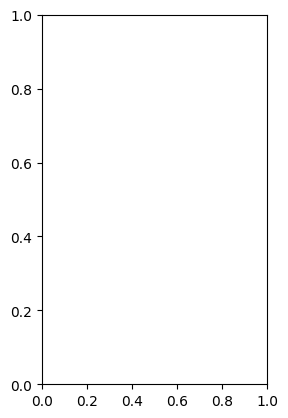

In [23]:
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(image, cmap='gray', interpolation='none', vmin=0, vmax=255)
ax1.set_title('Original')
plt.imshow(image, cmap='gray')

ax1 = fig.add_subplot(1, 2, 2)
ax1.imshow(image_with_boundary, cmap='gray', interpolation='none', vmin=0, vmax=255)
ax1.set_title('Con bordes')
plt.imshow(image, cmap='gray')
plt.plot([i[1] for i in boundary_pixels], [i[0] for i in boundary_pixels], 'ro')  

plt.show()